<div style="text-align: center">
  <h2>Projeto 4 - Álgebra Linear Numérica</h2>
  
  <p><strong>Roger Vinícius Pereira Augusto</strong><br>
  Matrícula: 241708020</p>

  <p><strong>Vinício Vasconcelos Muniz Deusdará</strong><br>
  Matrícula: 231708029</p>
</div>
<hr>

**Importações necessárias**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: Transformar função plot_inner_product_histogram para plotar em subplots
# TODO: Revisar a resposta da 1a
# TODO: Responder em texto corrido a 1b
# TODO: Responder em texto corrido a 1c

<hr>

**Questão 1. Matrizes Gaussianas.** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} \sim \mathcal{N} (0, 1)$

a) **Distribuição de normas.** Faça um histograma da norma-$2$ das colunas de uma matriz gaussiana $A$, $ m \times n $. Use vários valores de $m$, e comente o que você observa.

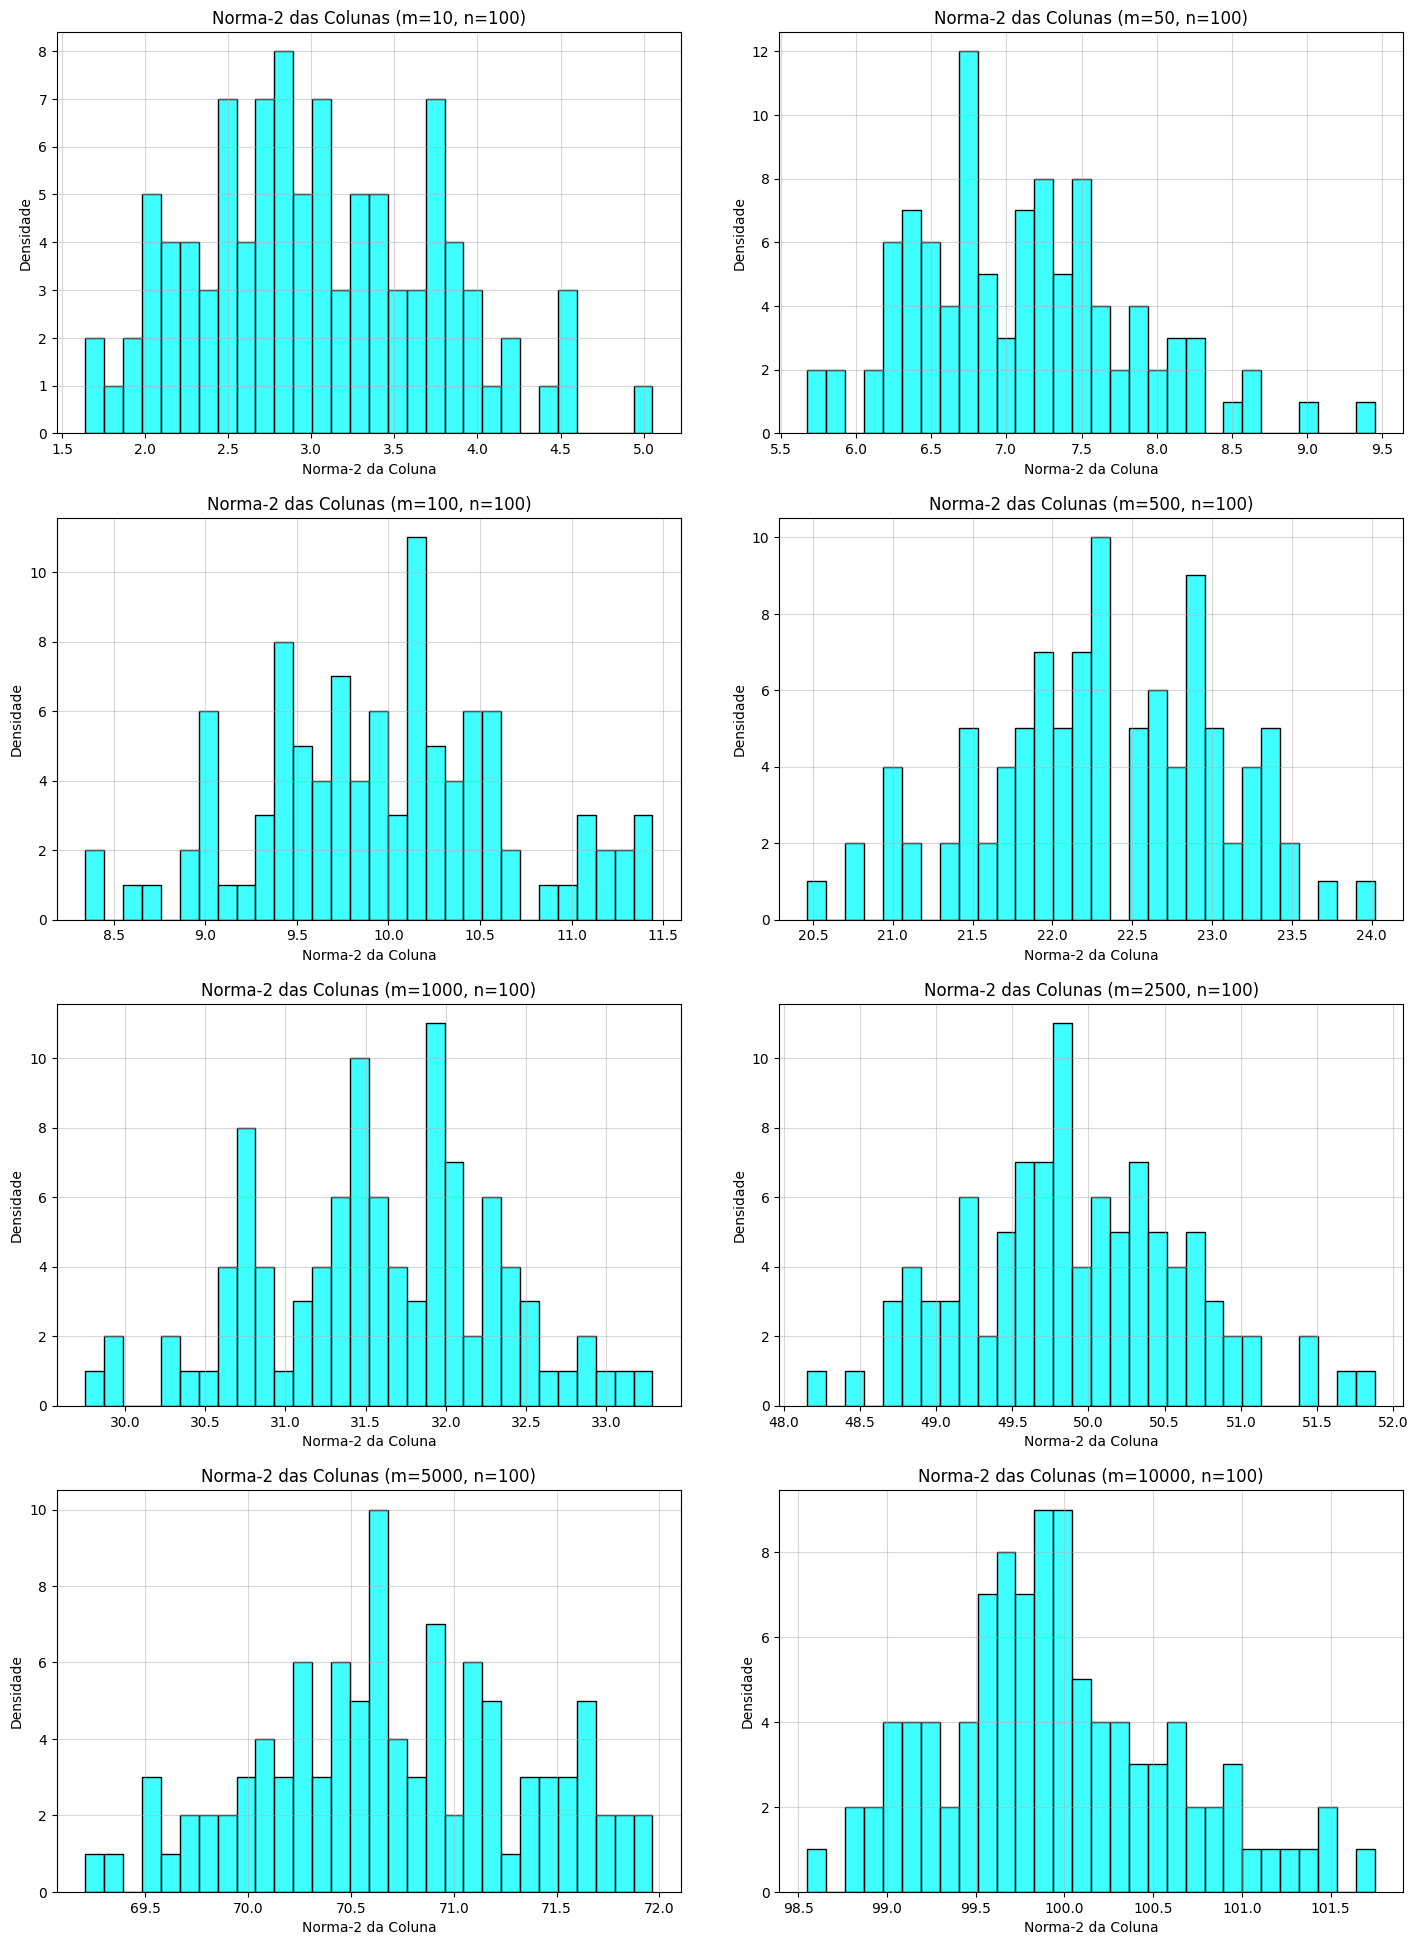

In [28]:
def plot_2_norm_histogram(m_values: list, n: int):
    """Gera matrizes gaussianas A (m x n) para diferentes valores de m,
    calcula a norma-2 de suas colunas e plota histogramas em subplots.

    Args:
        m_values (list): Lista contendo todos os valores de m
        n (int): Valor de n
    """

    num_plots = len(m_values)
    cols = 2
    rows = (num_plots + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.tight_layout(pad=4)
    
    axes = axes.ravel()
    
    # Iterar sobre os valores de m
    for idx, m in enumerate(m_values):

        # Gerar matriz gaussiana A (m x n)
        A = np.random.randn(m, n)
        
        # Calcular norma de cada coluna
        column_norms = np.linalg.norm(A, axis=0)
        
        sns.histplot(column_norms, bins=30, color="aqua", ax=axes[idx])
        axes[idx].set_title(f"Norma-2 das Colunas (m={m}, n={n})")
        axes[idx].set_xlabel("Norma-2 da Coluna")
        axes[idx].set_ylabel("Densidade")
        axes[idx].grid(alpha=0.5)
    
    plt.show()


m_values = [10, 50, 100, 500, 1000, 2500, 5000, 10000]
plot_2_norm_histogram(m_values, n=100)

**RESPOSTA:** Podemos perceber que, conforme $m$ aumenta, a norma-2 das colunas de $A$ cresce conjuntamente. Isso fica claro quando levamos em consideração a definição da norma-2 de uma coluna $a_j$:

$$
\|a_j\|_2 = \sqrt{a_{1j}^2 + a_{2j}^2 + \cdots + a_{mj}^2}
$$

Calculando o valor esperado de $\|a_{j}\|$, temos:

$$
\mathbb{E}[\|a_{j}\|_2^2] = m \cdot \mathbb{E}[a_{ij}^2] = m \cdot 1 = m 
$$

Portanto, temos que $\mathbb{E}[\|a_{j}\|_2] = \sqrt{m}$, o que explica o crescimento das normas em paralelo com o crescimento dos valores de $m$.

b) **Produtos internos.** Agora, fixe $m = 100$ e faça o histograma do produto interno $ \left< A_i, A_j \right>$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100$, $200$, $500$ e $1000$. O que acontece? Qual parece ser a distribuição para $n \rightarrow \infty$?

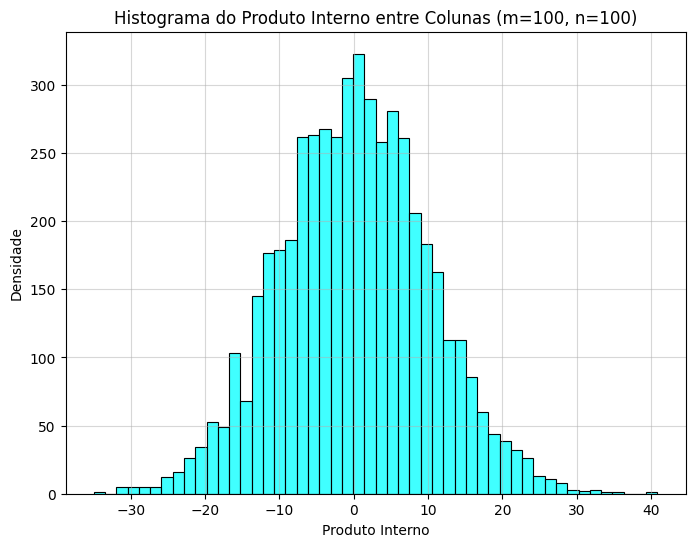

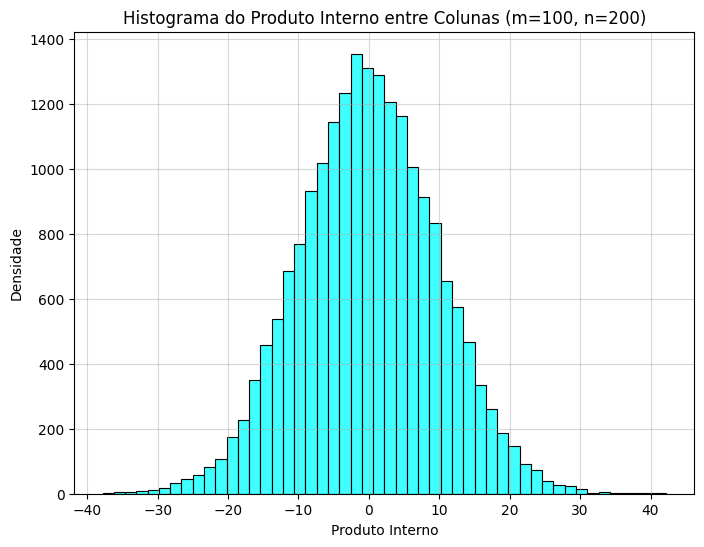

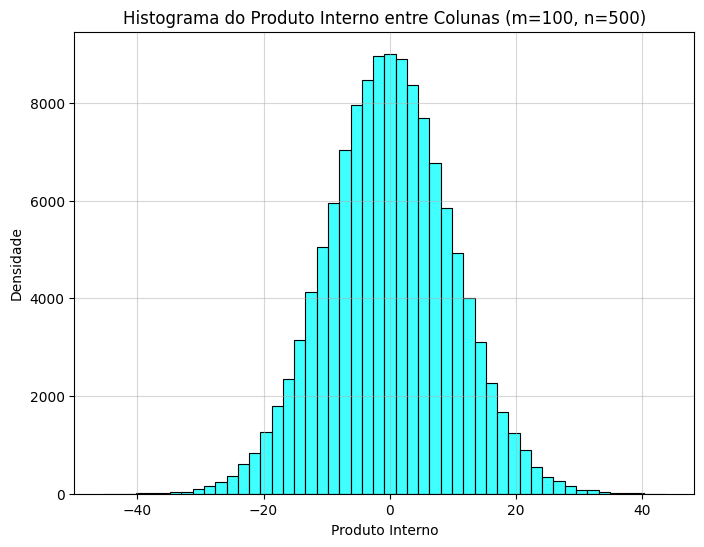

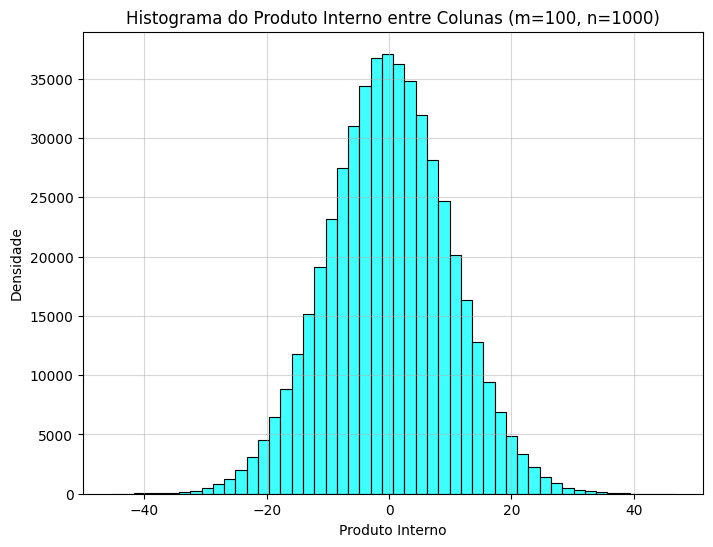

In [ ]:
def plot_inner_product_histogram(m=100, n_values=[100, 200, 500, 1000]):
    """Gera matrizes gaussianas A (m x n) com m=100 para diferentes valores de n,
    calcula o produto interno entre colunas distintas e plota histogramas.

    Args:
        m (int, optional): Valor de m fixado. Defaults to 100.
        n_values (list, optional): Lista contendo os valores de n. Defaults to [100, 200, 500, 1000].
    """
    for n in n_values:
        # Gerar matriz gaussiana A (m x n)
        A = np.random.randn(m, n)

        inner_products = []
        # Calcular o produto interno entre colunas distintas (i != j)
        for i in range(n):
            for j in range(i + 1, n):
                inner_product = np.dot(A[:, i], A[:, j])
                inner_products.append(inner_product)

        plt.figure(figsize=(8, 6))
        sns.histplot(inner_products, bins=50, color='aqua')
        plt.title(f'Histograma do Produto Interno entre Colunas (m={m}, n={n})')
        plt.xlabel('Produto Interno')
        plt.ylabel('Densidade')
        plt.grid(alpha=0.5)
        plt.show()


plot_inner_product_histogram()


**RESPOSTA:**

c) **A distribuição do máximo.** Queremos ver quão “não ortogonal” é a matriz $A$. Para isso, vamos estudar o máximo de $\dfrac{|\left<A_i, A_j \right>|}{\|A_i\|\|A_j\|}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 \times 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

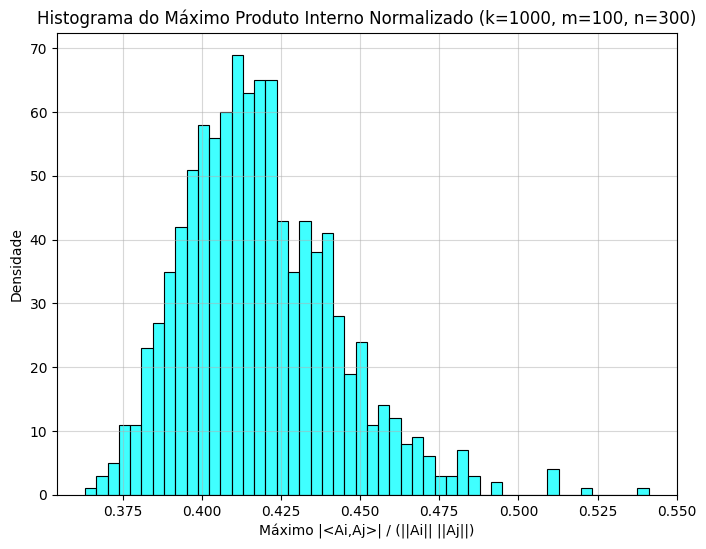

In [33]:
def max_cosine(m=100, n=300) -> float:
    """Gera uma matriz gaussiana A (m x n), calcula o máximo de |<Ai,Aj>| / (||Ai|| ||Aj||)
    entre colunas distintas.

    Args:
        m (int, optional): Número de linhas da matriz. Defaults to 100.
        n (int, optional): Número de colunas da matriz. Defaults to 300.

    Returns:
        float: Maior valor  de cosseno encontrado
    """
    A = np.random.randn(m, n)
    max_val = 0

    for i in range(n):
        for j in range(i + 1, n):
            col_i = A[:, i]
            col_j = A[:, j]
            inner_product = np.dot(col_i, col_j)
            norm_i = np.linalg.norm(col_i)
            norm_j = np.linalg.norm(col_j)

            if norm_i == 0 or norm_j == 0:
                continue

            normalized_inner_product = abs(inner_product) / (norm_i * norm_j)
            if normalized_inner_product > max_val:
                max_val = normalized_inner_product

    return max_val

def plot_cosines(k=1000, m=100, n=300):
    """Gera K matrizes gaussianas, calcula o máximo de |<Ai,Aj>| / (||Ai|| ||Aj||)
    para cada uma, e plota um histograma dos K valores obtidos.

    Args:
        k (int, optional): Número de matrizes gaussianas. Defaults to 1000.
        m (int, optional): Número de linhas das matrizes. Defaults to 100.
        n (int, optional): Número de colunas das matrizes. Defaults to 300.
    """

    max_values = []
    for _ in range(k):
        max_values.append(max_cosine(m, n))

    plt.figure(figsize=(8, 6))
    sns.histplot(max_values, bins=50, color='aqua')
    plt.title(f'Histograma do Máximo Produto Interno Normalizado (k={k}, m={m}, n={n})')
    plt.xlabel('Máximo |<Ai,Aj>| / (||Ai|| ||Aj||)')
    plt.ylabel('Densidade')
    plt.grid(alpha=0.5)
    plt.show()

plot_cosines()

d) **Complexidade computacional.** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

In [ ]:
def complexity():
    pass

def best_Ks() -> list:
    pass

k_values = best_Ks()

e) **A distribuição do máximo, parte 2.** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m, n)$: $(100, 100)$, $(100, 300)$ $(200, 200)$, $(200, 600)$, $(500, 500)$, $(500, 1500)$, $(1000, 1000)$, $(1000, 3000)$.

In [ ]:
def plot_cosines_2(k_values: list, m=100, n=300):
    pass